## Week 5, Lecture 1

Using online-retail-dataset.csv in Spark structured API, address the following tasks;

1. What is the total number of records in the online-retail-dataset
2. Most of the customers belong to which country ?
3. In description of how many items, color 'blue' is used ?
4. Identify the customer ID, which placed most orders.
5. Identify the customer ID, which bought the least number of products.
6. What is the range of dates in which this dataset was collected ?
7. Plot the number of orders against the hour of the day to demonstrate when most of the sales take place ?
8. How many unique stocks are on offer in the online retail store ?
9. Save firt 10000 records in the dataset in JSON format in a single file.
10. What is the total number of invoices given in the dataset ?

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

24/05/18 18:02:14 WARN Utils: Your hostname, MacBook-Pro-van-D.local resolves to a loopback address: 127.0.0.1; using 192.168.178.171 instead (on interface en0)
24/05/18 18:02:14 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/18 18:02:14 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
df = spark.read.format("csv")\
  .option("header", "true")\
  .option("inferSchema", "true")\
  .load("/Users/d.c.deh./Documents/Visual Studio/Data science 2/Spark-The-Definitive-Guide-master/data/retail-data/all/online-retail-dataset.csv")

In [3]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



# Class

### Aggregations

In [4]:
df.count()

541909

In [5]:
from pyspark.sql.functions import countDistinct
df.select(countDistinct("StockCode")).show()

+-------------------------+
|count(DISTINCT StockCode)|
+-------------------------+
|                     4070|
+-------------------------+



In [6]:
from pyspark.sql.functions import approx_count_distinct # Gives an overview of the amount; so it gives an estimation for when the df is too large
# and the counting takes too long. 0.1 stands for the confidence rate.
df.select(approx_count_distinct("StockCode", 0.1)).show()

+--------------------------------+
|approx_count_distinct(StockCode)|
+--------------------------------+
|                            3364|
+--------------------------------+



In [7]:
from pyspark.sql.functions import first, last
df.select(first("StockCode"), last("StockCode")).show()

+----------------+---------------+
|first(StockCode)|last(StockCode)|
+----------------+---------------+
|          85123A|          22138|
+----------------+---------------+



In [8]:
from pyspark.sql.functions import sum, count, avg, expr

df.select(
    count("Quantity").alias("total_transactions"),
    sum("Quantity").alias("total_purchases"),
    avg("Quantity").alias("avg_purchases"),
    expr("mean(Quantity)").alias("mean_purchases"))\
  .selectExpr(
    "total_purchases/total_transactions",
    "avg_purchases",
    "mean_purchases").show()

+--------------------------------------+----------------+----------------+
|(total_purchases / total_transactions)|   avg_purchases|  mean_purchases|
+--------------------------------------+----------------+----------------+
|                      9.55224954743324|9.55224954743324|9.55224954743324|
+--------------------------------------+----------------+----------------+



In [9]:
from pyspark.sql.functions import collect_set, collect_list # Set collects only unique values, list collects every value
df.agg(collect_set("Country"), collect_list("Country")).show()

+--------------------+---------------------+
|collect_set(Country)|collect_list(Country)|
+--------------------+---------------------+
|[Portugal, Italy,...| [United Kingdom, ...|
+--------------------+---------------------+



In [10]:
df.groupBy("InvoiceNo").count().show()

+---------+-----+
|InvoiceNo|count|
+---------+-----+
|   536596|    6|
|   536938|   14|
|   537252|    1|
|   537691|   20|
|   538041|    1|
|   538184|   26|
|   538517|   53|
|   538879|   19|
|   539275|    6|
|   539630|   12|
|   540499|   24|
|   540540|   22|
|  C540850|    1|
|   540976|   48|
|   536597|   28|
|   536608|    3|
|   536765|    1|
|   537439|    1|
|   537631|    1|
|   537870|    1|
+---------+-----+
only showing top 20 rows



In [11]:
df.groupBy("InvoiceNo", "CustomerId").count().show()

+---------+----------+-----+
|InvoiceNo|CustomerId|count|
+---------+----------+-----+
|   536846|     14573|   76|
|   537026|     12395|   12|
|   537883|     14437|    5|
|   538068|     17978|   12|
|   538279|     14952|    7|
|   538800|     16458|   10|
|   538942|     17346|   12|
|  C539947|     13854|    1|
|   540096|     13253|   16|
|   540530|     14755|   27|
|   541225|     14099|   19|
|   536596|      NULL|    6|
|   537252|      NULL|    1|
|   538041|      NULL|    1|
|   537159|     14527|   28|
|   537213|     12748|    6|
|   538191|     15061|   16|
|  C539301|     13496|    1|
|   539391|     12417|   11|
|   539462|     14032|   15|
+---------+----------+-----+
only showing top 20 rows



In [12]:
from pyspark.sql.functions import count
# Returns two columns that are the same, but done in different ways
df.groupBy("InvoiceNo").agg(count("Quantity").alias("Quan"), expr("count(Quantity)")).show()

+---------+----+---------------+
|InvoiceNo|Quan|count(Quantity)|
+---------+----+---------------+
|   536596|   6|              6|
|   536938|  14|             14|
|   537252|   1|              1|
|   537691|  20|             20|
|   538041|   1|              1|
|   538184|  26|             26|
|   538517|  53|             53|
|   538879|  19|             19|
|   539275|   6|              6|
|   539630|  12|             12|
|   540499|  24|             24|
|   540540|  22|             22|
|  C540850|   1|              1|
|   540976|  48|             48|
|   536597|  28|             28|
|   536608|   3|              3|
|   536765|   1|              1|
|   537439|   1|              1|
|   537631|   1|              1|
|   537870|   1|              1|
+---------+----+---------------+
only showing top 20 rows



In [13]:
dfNoNull = df.drop()
dfNoNull.createOrReplaceTempView("dfNoNull")

In [14]:
from pyspark.sql.functions import window, column, desc, asc, col
df.selectExpr("CustomerId", "(UnitPrice * Quantity) as total_cost", "InvoiceDate")\
.groupBy(col("CustomerId"), window(col("InvoiceDate"), "1 day")).sum("total_cost").sort(desc("sum(total_cost)")).show(5)

+----------+------+---------------+
|CustomerId|window|sum(total_cost)|
+----------+------+---------------+
+----------+------+---------------+



### Creating df's

In [15]:
person = spark.createDataFrame([
    (0, "Bill Chambers", 0, [100]),
    (1, "Matei Zaharia", 1, [500, 250, 100]),
    (2, "Michael Armbrust", 1, [250, 100])])\
  .toDF("id", "name", "graduate_program", "spark_status")
graduateProgram = spark.createDataFrame([
    (0, "Masters", "School of Information", "UC Berkeley"),
    (2, "Masters", "EECS", "UC Berkeley"),
    (1, "Ph.D.", "EECS", "UC Berkeley")])\
  .toDF("id", "degree", "department", "school")
sparkStatus = spark.createDataFrame([
    (500, "Vice President"),
    (250, "PMC Member"),
    (100, "Contributor")])\
  .toDF("id", "status")

In [16]:
person.createOrReplaceTempView("person")
person.createOrReplaceTempView("graduateProgram")
person.createOrReplaceTempView("sparkStatus")

In [17]:
joinExpression = person["graduate_program"] == graduateProgram['id'] # works because the type and values are the same

In [18]:
wrongJoinExpression = person["name"] == graduateProgram["school"] #Doesn't work because they don't have anything in common

In [19]:
joinType = "inner"

In [20]:
graduateProgram.join(person, joinExpression, joinType).show()

+---+-------+--------------------+-----------+---+----------------+----------------+---------------+
| id| degree|          department|     school| id|            name|graduate_program|   spark_status|
+---+-------+--------------------+-----------+---+----------------+----------------+---------------+
|  0|Masters|School of Informa...|UC Berkeley|  0|   Bill Chambers|               0|          [100]|
|  1|  Ph.D.|                EECS|UC Berkeley|  1|   Matei Zaharia|               1|[500, 250, 100]|
|  1|  Ph.D.|                EECS|UC Berkeley|  2|Michael Armbrust|               1|     [250, 100]|
+---+-------+--------------------+-----------+---+----------------+----------------+---------------+



1. What is the total number of records in the online-retail-dataset
2. Most of the customers belong to which country ?
3. In description of how many items, color 'blue' is used ?
4. Identify the customer ID, which placed most orders.
5. Identify the customer ID, which bought the least number of products.
6. What is the range of dates in which this dataset was collected ?
7. Plot the number of orders against the hour of the day to demonstrate when most of the sales take place ?
8. How many unique stocks are on offer in the online retail store ?
9. Save firt 10000 records in the dataset in JSON format in a single file.
10. What is the total number of invoices given in the dataset ?

# 1. What is the total number of records in the online-retail-dataset

In [21]:
from pyspark.sql.functions import col
df.select(col("InvoiceNo")).count()

541909

# 2. Most of the customers belong to which country ?

In [22]:
df.groupBy("Country").count().show()

+---------------+-----+
|        Country|count|
+---------------+-----+
|         Sweden|  462|
|        Germany| 9495|
|         France| 8557|
|        Belgium| 2069|
|        Finland|  695|
|          Italy|  803|
|           EIRE| 8196|
|      Lithuania|   35|
|         Norway| 1086|
|          Spain| 2533|
|        Denmark|  389|
|        Iceland|  182|
|         Israel|  297|
|Channel Islands|  758|
|         Cyprus|  622|
|    Switzerland| 2002|
|          Japan|  358|
|         Poland|  341|
|       Portugal| 1519|
|      Australia| 1259|
+---------------+-----+
only showing top 20 rows



# 3. In description of how many items, color 'blue' is used ?

In [23]:
df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



In [24]:
df.createOrReplaceTempView("df")
spark.sql("SELECT COUNT(*) FROM df WHERE Description LIKE '%blue%'").show()

+--------+
|count(1)|
+--------+
|       3|
+--------+



# 4. Identify the customer ID, which placed most orders.

In [25]:
new_df = df.dropna()

In [26]:
customer_orders = new_df.groupBy("CustomerID").count()
customer_orders_desc = customer_orders.orderBy(desc("count")).show()

+----------+-----+
|CustomerID|count|
+----------+-----+
|     17841| 7983|
|     14911| 5903|
|     14096| 5128|
|     12748| 4642|
|     14606| 2782|
|     15311| 2491|
|     14646| 2085|
|     13089| 1857|
|     13263| 1677|
|     14298| 1640|
|     15039| 1508|
|     14156| 1420|
|     18118| 1284|
|     14159| 1212|
|     14796| 1165|
|     15005| 1160|
|     16033| 1152|
|     14056| 1128|
|     14769| 1094|
|     17511| 1076|
+----------+-----+
only showing top 20 rows



# 5. Identify the customer ID, which bought the least number of products.

In [27]:
new_df.groupBy("CustomerId").agg({"Quantity": "sum"}).orderBy(asc("sum(Quantity)")).show()

+----------+-------------+
|CustomerId|sum(Quantity)|
+----------+-------------+
|     16546|         -303|
|     15823|         -283|
|     14213|         -244|
|     16742|         -189|
|     16252|         -158|
|     17307|         -144|
|     17548|         -132|
|     18256|          -70|
|     12666|          -56|
|     15638|          -52|
|     15728|          -34|
|     17603|          -31|
|     13958|          -23|
|     13829|          -12|
|     18141|          -12|
|     16579|          -12|
|     14777|           -9|
|     13693|           -6|
|     17820|           -5|
|     16262|           -5|
+----------+-------------+
only showing top 20 rows



# 6. What is the range of dates in which this dataset was collected ?

In [28]:
from pyspark.sql.functions import first, last
new_df.select(first("InvoiceDate"), last("InvoiceDate")).show()

+------------------+-----------------+
|first(InvoiceDate)|last(InvoiceDate)|
+------------------+-----------------+
|    12/1/2010 8:26|  12/9/2011 12:50|
+------------------+-----------------+



# 7. Plot the number of orders against the hour of the day to demonstrate when most of the sales take place ?

In [29]:
new_df.select("InvoiceDate").show(5)

+--------------+
|   InvoiceDate|
+--------------+
|12/1/2010 8:26|
|12/1/2010 8:26|
|12/1/2010 8:26|
|12/1/2010 8:26|
|12/1/2010 8:26|
+--------------+
only showing top 5 rows



In [30]:
from pyspark.sql.functions import to_timestamp
converted_time_df = new_df.withColumn("InvoiceDate", to_timestamp(new_df["InvoiceDate"], "M/d/yyyy H:mm"))

In [31]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import hour

time_df = converted_time_df.withColumn("InvoiceDate", converted_time_df["InvoiceDate"].cast("timestamp"))
time_df = time_df.withColumn("Hour", hour("InvoiceDate"))

orders_per_hour = time_df.groupBy("Hour").count().orderBy("Hour")

orders_per_hour_pd = orders_per_hour.toPandas()

<BarContainer object of 15 artists>

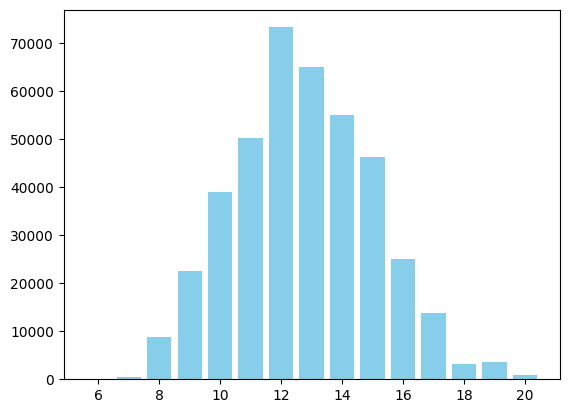

In [32]:
plt.bar(orders_per_hour_pd["Hour"], orders_per_hour_pd["count"], color='skyblue')

# 8. How many unique stocks are on offer in the online retail store ?

In [33]:
from pyspark.sql.functions import countDistinct
new_df.select(countDistinct("StockCode")).show()

+-------------------------+
|count(DISTINCT StockCode)|
+-------------------------+
|                     3684|
+-------------------------+



# 9. Save firt 10000 records in the dataset in JSON format in a single file.

In [34]:
json_df = new_df.limit(1000)

In [35]:
json_df.write.format("json").mode("overwrite").save("/tmp/my-json-file.json")

In [36]:
read_json_df = spark.read.format("json").option("header", "true").option("inferSchema", "true").load("/tmp/my-json-file.json/")

In [37]:
read_json_df.show(5)

+--------------+----------+--------------------+--------------+---------+--------+---------+---------+
|       Country|CustomerID|         Description|   InvoiceDate|InvoiceNo|Quantity|StockCode|UnitPrice|
+--------------+----------+--------------------+--------------+---------+--------+---------+---------+
|United Kingdom|     17850|WHITE HANGING HEA...|12/1/2010 8:26|   536365|       6|   85123A|     2.55|
|United Kingdom|     17850| WHITE METAL LANTERN|12/1/2010 8:26|   536365|       6|    71053|     3.39|
|United Kingdom|     17850|CREAM CUPID HEART...|12/1/2010 8:26|   536365|       8|   84406B|     2.75|
|United Kingdom|     17850|KNITTED UNION FLA...|12/1/2010 8:26|   536365|       6|   84029G|     3.39|
|United Kingdom|     17850|RED WOOLLY HOTTIE...|12/1/2010 8:26|   536365|       6|   84029E|     3.39|
+--------------+----------+--------------------+--------------+---------+--------+---------+---------+
only showing top 5 rows



In [38]:
read_json_df.count()

1000

# 10. What is the total number of invoices given in the dataset ?

In [39]:
new_df.printSchema()

root
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: string (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: integer (nullable = true)
 |-- Country: string (nullable = true)



In [40]:
new_df.select("InvoiceNo").count()

406829

# Trying some small things myself

In [41]:
from pyspark.sql.functions import corr
new_df.select(corr("Quantity", "UnitPrice")).show()

+-------------------------+
|corr(Quantity, UnitPrice)|
+-------------------------+
|     -0.00123771410128...|
+-------------------------+



In [42]:
from pyspark.sql.functions import sum
new_df.select(sum("Quantity"), sum("UnitPrice")).show()

+-------------+------------------+
|sum(Quantity)|    sum(UnitPrice)|
+-------------+------------------+
|      4906888|1407819.9639999536|
+-------------+------------------+



24/05/18 18:02:30 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
